# Name:
#          Adnan Akhter 

# Topic:
#             Predicting The House Price Using Machine Learning

In [1]:
# #pip install bayesian-optimization
# pip install 'ray[tune]'

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics

#Random Forest
# from hyperband import HyperbandSearchCV
# from scipy.stats import randint as sp_randint


In [3]:
%matplotlib inline

In [4]:
#loading the dataset of USA Hosing
df = pd.read_csv('multanplots.csv')
df.head(200)

,Sr. No/ID,Colony,Phasees,Block,Zone,Size in Marla,Side,Park Facing,Market Facing,Near Mosque,Near School,Electricity,Natural Gas,WASA,Pricees
0,1,Alfalah Modern City,1,1,1,5.0,0,0,0,0,0,1,1,1,25.0
1,2,Alfalah Modern City,1,1,1,5.0,0,1,0,0,0,1,1,1,25.0
2,3,Alfalah Modern City,1,1,2,5.0,0,1,1,0,0,1,1,1,27.5
3,4,Alfalah Modern City,1,1,2,5.0,0,1,1,1,0,1,1,1,27.5
4,5,Alfalah Modern City,1,1,1,5.0,1,0,0,0,0,1,1,1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Royal Grace City,1,1,1,5.0,1,0,0,0,0,1,1,1,17.5
196,197,Royal Grace City,1,1,1,5.0,0,1,0,1,0,1,1,1,15.0
197,198,Royal Grace City,1,1,1,5.0,0,1,0,0,0,1,1,1,15.0
198,199,Royal Grace City,1,1,1,7.0,0,0,0,0,0,1,1,1,21.0


In [5]:
df.columns

Index(['Sr. No/ID', 'Colony', 'Phasees', 'Block', 'Zone', 'Size in Marla',
       'Side', 'Park Facing', 'Market Facing', 'Near Mosque', 'Near School',
       'Electricity', 'Natural Gas', 'WASA', 'Pricees'],
      dtype='object')

In [6]:
# df.columns=['income', 'age', 'rooms', 'bedrooms', 'population', 'Price', 'address']

# Can some interesting feature be extraced from address column data

In [7]:
from sklearn.preprocessing import OrdinalEncoder
le =OrdinalEncoder()
df["Colony_new"] = le.fit_transform(df[["Colony"]])
df.tail()

,Sr. No/ID,Colony,Phasees,Block,Zone,Size in Marla,Side,Park Facing,Market Facing,Near Mosque,Near School,Electricity,Natural Gas,WASA,Pricees,Colony_new
203,204,Royal Grace City,1,1,1,15.0,1,0,0,0,0,1,1,1,45.0,7.0
204,205,Royal Grace City,1,1,1,20.0,0,0,0,0,0,1,1,1,40.0,7.0
205,206,Royal Grace City,1,1,1,20.0,1,0,0,0,0,1,1,1,40.0,7.0
206,207,Royal Grace City,1,1,1,20.0,0,1,0,0,0,1,1,1,40.0,7.0
207,208,Royal Grace City,1,1,1,20.0,1,1,0,0,0,1,1,1,40.0,7.0


In [8]:
df.dtypes

Sr. No/ID          int64
Colony            object
Phasees            int64
Block              int64
Zone               int64
Size in Marla    float64
Side               int64
Park Facing        int64
Market Facing      int64
Near Mosque        int64
Near School        int64
Electricity        int64
Natural Gas        int64
WASA               int64
Pricees          float64
Colony_new       float64
dtype: object

# working with missing values

In [9]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
df["new_Colony"]=norm.fit_transform(df[["Colony_new"]])
df["new_Phase"]=norm.fit_transform(df[["Phasees"]])
df["new_Block"]=norm.fit_transform(df[["Block"]])
df["new_Zone"]=norm.fit_transform(df[["Zone"]])
df["new_marla"]=norm.fit_transform(df[["Size in Marla"]])
df["new_Side"]=norm.fit_transform(df[["Side"]])
df["new_Park Facing"]=norm.fit_transform(df[["Park Facing"]])
df["new_market"]=norm.fit_transform(df[["Market Facing"]])
df["new_Near Mosque"]=norm.fit_transform(df[["Near Mosque"]])
df["new_Near School"]=norm.fit_transform(df[["Near School"]])
df["new_Electricity"]=norm.fit_transform(df[["Electricity"]])
df["new_Natural Gas"]=norm.fit_transform(df[["Natural Gas"]])
df["new_WASA"]=norm.fit_transform(df[["WASA"]])

df.head()

,Sr. No/ID,Colony,Phasees,Block,Zone,Size in Marla,Side,Park Facing,Market Facing,Near Mosque,...,new_Zone,new_marla,new_Side,new_Park Facing,new_market,new_Near Mosque,new_Near School,new_Electricity,new_Natural Gas,new_WASA
0,1,Alfalah Modern City,1,1,1,5.0,0,0,0,0,...,0.0,0.054054,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,Alfalah Modern City,1,1,1,5.0,0,1,0,0,...,0.0,0.054054,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,Alfalah Modern City,1,1,2,5.0,0,1,1,0,...,1.0,0.054054,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,Alfalah Modern City,1,1,2,5.0,0,1,1,1,...,1.0,0.054054,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,5,Alfalah Modern City,1,1,1,5.0,1,0,0,0,...,0.0,0.054054,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
#no. of rows and col.s
df.shape

(208, 29)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sr. No/ID        208 non-null    int64  
 1   Colony           208 non-null    object 
 2   Phasees          208 non-null    int64  
 3   Block            208 non-null    int64  
 4   Zone             208 non-null    int64  
 5   Size in Marla    208 non-null    float64
 6   Side             208 non-null    int64  
 7   Park Facing      208 non-null    int64  
 8   Market Facing    208 non-null    int64  
 9   Near Mosque      208 non-null    int64  
 10  Near School      208 non-null    int64  
 11  Electricity      208 non-null    int64  
 12  Natural Gas      208 non-null    int64  
 13  WASA             208 non-null    int64  
 14  Pricees          208 non-null    float64
 15  Colony_new       208 non-null    float64
 16  new_Colony       208 non-null    float64
 17  new_Phase       

In [12]:
df.isna()

,Sr. No/ID,Colony,Phasees,Block,Zone,Size in Marla,Side,Park Facing,Market Facing,Near Mosque,...,new_Zone,new_marla,new_Side,new_Park Facing,new_market,new_Near Mosque,new_Near School,new_Electricity,new_Natural Gas,new_WASA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull()

,Sr. No/ID,Colony,Phasees,Block,Zone,Size in Marla,Side,Park Facing,Market Facing,Near Mosque,...,new_Zone,new_marla,new_Side,new_Park Facing,new_market,new_Near Mosque,new_Near School,new_Electricity,new_Natural Gas,new_WASA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

Sr. No/ID          0
Colony             0
Phasees            0
Block              0
Zone               0
Size in Marla      0
Side               0
Park Facing        0
Market Facing      0
Near Mosque        0
Near School        0
Electricity        0
Natural Gas        0
WASA               0
Pricees            0
Colony_new         0
new_Colony         0
new_Phase          0
new_Block          0
new_Zone           0
new_marla          0
new_Side           0
new_Park Facing    0
new_market         0
new_Near Mosque    0
new_Near School    0
new_Electricity    0
new_Natural Gas    0
new_WASA           0
dtype: int64

In [15]:
df.isna().any()

Sr. No/ID          False
Colony             False
Phasees            False
Block              False
Zone               False
Size in Marla      False
Side               False
Park Facing        False
Market Facing      False
Near Mosque        False
Near School        False
Electricity        False
Natural Gas        False
WASA               False
Pricees            False
Colony_new         False
new_Colony         False
new_Phase          False
new_Block          False
new_Zone           False
new_marla          False
new_Side           False
new_Park Facing    False
new_market         False
new_Near Mosque    False
new_Near School    False
new_Electricity    False
new_Natural Gas    False
new_WASA           False
dtype: bool

In [16]:
#description of dataset
df.describe()

,Sr. No/ID,Phasees,Block,Zone,Size in Marla,Side,Park Facing,Market Facing,Near Mosque,Near School,...,new_Zone,new_marla,new_Side,new_Park Facing,new_market,new_Near Mosque,new_Near School,new_Electricity,new_Natural Gas,new_WASA
count,208.000000,208.0,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.0,208.000000,208.0
mean,104.500000,1.0,1.480769,1.105769,11.875481,0.442308,0.322115,0.086538,0.187500,0.033654,...,0.105769,0.239878,0.442308,0.322115,0.086538,0.187500,0.033654,0.0,0.697115,0.0
std,60.188592,0.0,1.094393,0.308284,8.010381,0.497859,0.468414,0.281836,0.391254,0.180772,...,0.308284,0.216497,0.497859,0.468414,0.281836,0.391254,0.180772,0.0,0.460614,0.0
min,1.000000,1.0,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,52.750000,1.0,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.081081,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,104.500000,1.0,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.189189,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0
75%,156.250000,1.0,1.000000,1.000000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.324324,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0
max,208.000000,1.0,6.000000,2.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0


In [17]:
df.columns

Index(['Sr. No/ID', 'Colony', 'Phasees', 'Block', 'Zone', 'Size in Marla',
       'Side', 'Park Facing', 'Market Facing', 'Near Mosque', 'Near School',
       'Electricity', 'Natural Gas', 'WASA', 'Pricees', 'Colony_new',
       'new_Colony', 'new_Phase', 'new_Block', 'new_Zone', 'new_marla',
       'new_Side', 'new_Park Facing', 'new_market', 'new_Near Mosque',
       'new_Near School', 'new_Electricity', 'new_Natural Gas', 'new_WASA'],
      dtype='object')

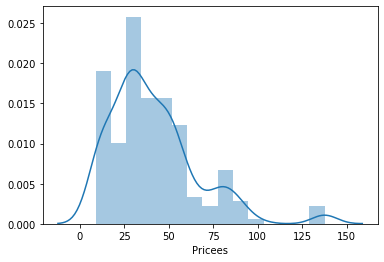

In [18]:
#use seaborn library to visualize the attribute price
sns.distplot(df['Pricees'])

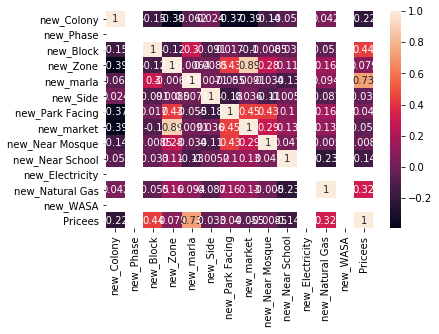

In [19]:
sns.heatmap(df[[ "new_Colony", "new_Phase", "new_Block", "new_Zone", "new_marla",
       "new_Side", "new_Park Facing", "new_market", "new_Near Mosque",
       "new_Near School", "new_Electricity", "new_Natural Gas", "new_WASA","Pricees"]].corr(),annot = True)

#this corr map is used to find the correlation between the attributes and the pricing so as to 
#get an idea about the relationship between them.

In [20]:
df.columns 

Index(['Sr. No/ID', 'Colony', 'Phasees', 'Block', 'Zone', 'Size in Marla',
       'Side', 'Park Facing', 'Market Facing', 'Near Mosque', 'Near School',
       'Electricity', 'Natural Gas', 'WASA', 'Pricees', 'Colony_new',
       'new_Colony', 'new_Phase', 'new_Block', 'new_Zone', 'new_marla',
       'new_Side', 'new_Park Facing', 'new_market', 'new_Near Mosque',
       'new_Near School', 'new_Electricity', 'new_Natural Gas', 'new_WASA'],
      dtype='object')

In [21]:
x = df.iloc[:,16:]
print(x)

#separate the other attributes from the predicting attribute

     new_Colony  new_Phase  new_Block  new_Zone  new_marla  new_Side  \
0           0.0        0.0        0.0       0.0   0.054054       0.0   
1           0.0        0.0        0.0       0.0   0.054054       0.0   
2           0.0        0.0        0.0       1.0   0.054054       0.0   
3           0.0        0.0        0.0       1.0   0.054054       0.0   
4           0.0        0.0        0.0       0.0   0.054054       1.0   
..          ...        ...        ...       ...        ...       ...   
203         1.0        0.0        0.0       0.0   0.324324       1.0   
204         1.0        0.0        0.0       0.0   0.459459       0.0   
205         1.0        0.0        0.0       0.0   0.459459       1.0   
206         1.0        0.0        0.0       0.0   0.459459       0.0   
207         1.0        0.0        0.0       0.0   0.459459       1.0   

     new_Park Facing  new_market  new_Near Mosque  new_Near School  \
0                0.0         0.0              0.0              0.

In [22]:
y = df.iloc[:,14]
print(y)
#separte the predicting attribute into Y for model training 

0      25.0
1      25.0
2      27.5
3      27.5
4      25.0
       ... 
203    45.0
204    40.0
205    40.0
206    40.0
207    40.0
Name: Pricees, Length: 208, dtype: float64


In [23]:
#import model selection train test split for splitting the data into test and train for 
#model validation.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [24]:
print(y_test)

177     52.00
112     40.00
182     19.60
148     26.40
183     21.00
171     80.00
135     50.60
89      86.00
37      35.75
34      39.75
147     35.10
65      80.00
78      50.00
154     12.80
142     35.42
66      90.00
85      44.00
175     52.50
31      80.00
91     137.60
42      27.00
41      30.25
155     10.50
54      50.00
169      9.60
48      15.00
50      30.00
160     11.10
163     13.20
159      9.90
25      50.00
55      60.00
204     40.00
2       27.50
12      28.00
139     48.50
149     44.80
22      30.00
133     54.00
39      33.00
32      52.00
145     37.45
Name: Pricees, dtype: float64


In [25]:
print(X_test)

     new_Colony  new_Phase  new_Block  new_Zone  new_marla  new_Side  \
177    0.857143        0.0        0.0       0.0   0.459459       1.0   
112    0.428571        0.0        0.4       0.0   0.459459       0.0   
182    0.857143        0.0        0.0       0.0   0.108108       0.0   
148    0.571429        0.0        0.0       0.0   0.067568       0.0   
183    0.857143        0.0        0.0       0.0   0.108108       1.0   
171    0.857143        0.0        0.0       0.0   1.000000       1.0   
135    0.571429        0.0        0.0       0.0   0.216216       1.0   
89     0.285714        0.0        0.8       0.0   0.459459       0.0   
37     0.142857        0.0        0.0       0.0   0.270270       1.0   
34     0.142857        0.0        0.0       0.0   0.324324       0.0   
147    0.571429        0.0        0.0       0.0   0.094595       1.0   
65     0.285714        0.0        0.0       0.0   0.324324       0.0   
78     0.285714        0.0        0.4       0.0   0.189189      

In [26]:
print(X_train)

     new_Colony  new_Phase  new_Block  new_Zone  new_marla  new_Side  \
74     0.285714        0.0        0.2       0.0   0.135135       0.0   
196    1.000000        0.0        0.0       0.0   0.054054       0.0   
119    0.428571        0.0        0.6       0.0   0.459459       1.0   
16     0.000000        0.0        0.0       0.0   0.189189       0.0   
207    1.000000        0.0        0.0       0.0   0.459459       1.0   
..          ...        ...        ...       ...        ...       ...   
63     0.285714        0.0        0.0       0.0   0.324324       1.0   
70     0.285714        0.0        0.2       0.0   0.054054       0.0   
81     0.285714        0.0        0.4       0.0   0.189189       0.0   
11     0.000000        0.0        0.0       1.0   0.108108       0.0   
95     0.428571        0.0        0.0       0.0   0.459459       1.0   

     new_Park Facing  new_market  new_Near Mosque  new_Near School  \
74               0.0         0.0              0.0              0.

In [27]:
print(y_train)

74     35.9
196    15.0
119    30.0
16     30.0
207    40.0
       ... 
63     90.0
70     22.0
81     50.0
11     30.0
95     60.0
Name: Pricees, Length: 166, dtype: float64


In [28]:
print(X_train.shape)

(166, 13)


In [29]:
print(y_train.shape)

(166,)


In [30]:
print(X_test.shape)

(42, 13)


In [31]:
print(y_test.shape)

(42,)


# Algorithms
# 1.Linear Regression
# 2. Gradient Boosting Regression
# 3. Random Forest Regression

# 1. Linear Regression

In [32]:
#Linear Regression and Scores
from sklearn.linear_model import LinearRegression

#loading the model constructor
lm = LinearRegression()
#training or fitting the train data into the model
lm.fit(X_train,y_train)
#sc1 = lm.score(X_test, y_test)
#print('Score of Linear Regression:',np.round(sc1, 3))
predictions = lm.predict(X_test)
sc1=r2_score(y_test,predictions)
print('Score of Linear Regression:',np.round(sc1, 3))

Score of Linear Regression: 0.823


In [33]:
print(lm.intercept_)

15.80619782680899


In [34]:
lm.coef_
#examining the co-efficients of the fitted model.

array([-1.37912569e+01, -6.21724894e-15,  2.56583314e+01,  5.17397758e+01,
        7.65150556e+01,  1.73908641e+00, -4.62712718e-02, -6.34281360e+01,
        3.24229090e+00,  2.13466087e+00,  0.00000000e+00,  1.36222859e+01,
        0.00000000e+00])

In [35]:
#x_train.columns

In [36]:
#cdf = pd.DataFrame(data=lm.coef_.reshape(5,1), index=x_train.columns, columns=['Coeff'])

In [37]:
#cdf

# Scatter Plot of linear Regression

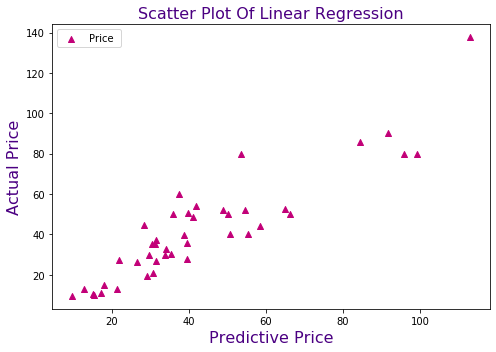

In [38]:

plt.figure(figsize=(7,5))
plt.scatter(predictions, y_test, label='Price ', marker= '^',color='#C20078' )
plt.title('Scatter Plot Of Linear Regression',color='indigo',fontsize=16)
plt.xlabel('Predictive Price',color='indigo',fontsize=16)
plt.ylabel('Actual Price',color='indigo',fontsize=16)
plt.legend()
plt.tight_layout()
plt.savefig('L.svg')
plt.show()
#to visualise the predictions and the test Y !! almost it is forming a linear line with less deviation

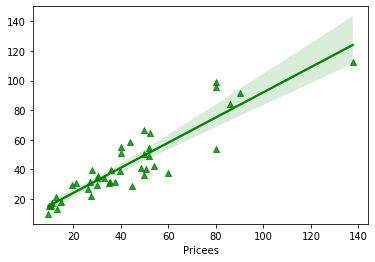

In [39]:
sns. regplot(y_test,predictions, color='green', label= 'price',marker = '^')


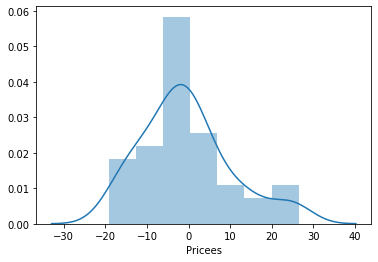

In [40]:
sns.distplot((y_test-predictions))

# Mean and Root mean Errors of Linear regression

In [41]:
#mean absolute error
MAE = metrics.mean_absolute_error(y_test,predictions)
print('Mean absolute error:', MAE)

#mean square error
MSE = (metrics.mean_squared_error(y_test, predictions))
print('Mean square error:', MSE)

#root mean square error
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('Root Mean square error:', RMSE)

Mean absolute error: 8.275716314100386
Mean square error: 116.63256642126684
Root Mean square error: 10.799655847353046


# 2. Gradient Boosting Regression

In [42]:
#Gradient Boosting Regression and Score
from sklearn.ensemble import GradientBoostingRegressor
grb = GradientBoostingRegressor()
grb.fit(X_train, y_train.values.ravel())
#The score of GBR
#sc2 = grb.score(X_test, y_test)
#print('Score of Gradient Boosting Regression:',np.round(sc2, 3))
Gpredictions = grb.predict(X_test)
sc2=r2_score(Gpredictions,y_test)
print('Score of Gradient Boosting Regression:',np.round(sc2, 3))


Score of Gradient Boosting Regression: 0.983


# Scatter Plot of Gradient Boosting

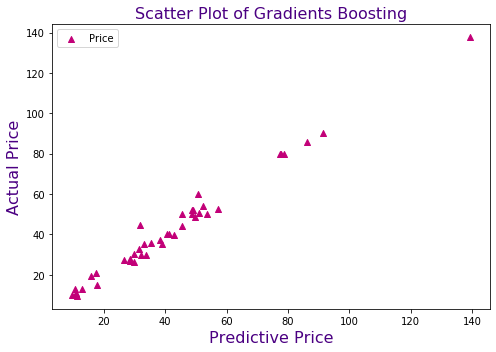

In [43]:

plt.figure(figsize=(7,5))
plt.scatter(Gpredictions,y_test , label='Price', marker= '^',color='#C20078')
plt.title('Scatter Plot of Gradients Boosting',color='indigo',fontsize=16)
plt.xlabel('Predictive Price',color='indigo',fontsize=16)
plt.ylabel('Actual Price',color='indigo',fontsize=16)
plt.legend()
plt.tight_layout()
plt.savefig('G.svg')
plt.show()

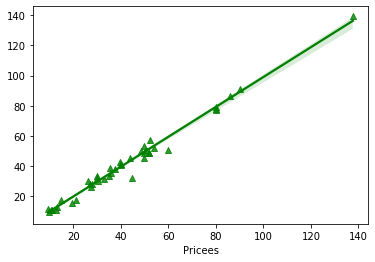

In [44]:
sns. regplot(y_test, Gpredictions, color='green', label= 'price',marker = '^')

# Mean and Root mean error of Gradient Boosting

In [45]:
#mean absolute error
MAEG = metrics.mean_absolute_error(y_test,Gpredictions)
print('Mean absolute error:', MAEG)

#mean square error
MSEG = (metrics.mean_squared_error(y_test, Gpredictions))

print('Mean square error:', MSEG)

#root mean square error
RMSEG = np.sqrt(metrics.mean_squared_error(y_test, Gpredictions))
print('Root Mean square error:', RMSEG)

Mean absolute error: 2.3392390083304853
Mean square error: 11.066932237635822
Root Mean square error: 3.326699901950253


# 3. Random Forest Regression

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train.values.ravel())
#The score of Random forest
#sc3 = rfr.score(X_test, y_test)
#print('Score of Random Forest Regression:',np.round(sc3, 3))
Rpredictions = rfr.predict(X_test)
sc3=r2_score(y_test,Rpredictions)
print('Score of Random Forest Regression:',np.round(sc3, 3))

Score of Random Forest Regression: 0.97


# Scatter plot of Random Forest

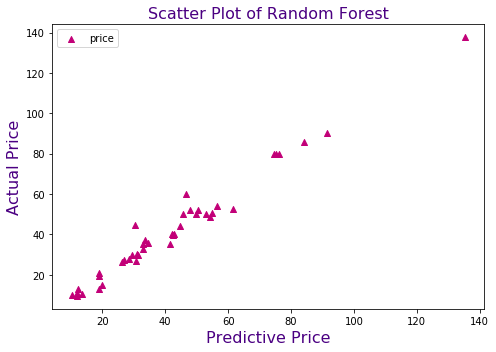

In [102]:

plt.figure(figsize=(7,5))
plt.scatter( Rpredictions ,y_test, marker= '^',color='#C20078',label='price')
plt.title('Scatter Plot of Random Forest',color='indigo',fontsize=16)
plt.xlabel('Predictive Price',color='indigo',fontsize=16)
plt.ylabel('Actual Price',color='indigo',fontsize=16)
plt.legend()
plt.tight_layout()
plt.savefig('R.svg')
plt.show()

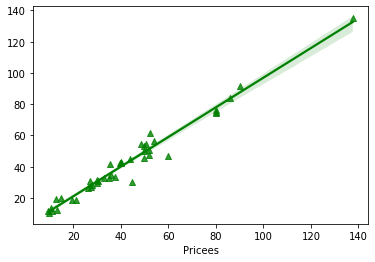

In [103]:
sns. regplot(y_test, Rpredictions, color='green', label= 'price',marker = '^')

# Mean and Root mean error Random Forest

In [104]:
#mean absolute error
MAER = metrics.mean_absolute_error(y_test,Rpredictions)
print('Mean absolute error:', MAER)

#mean square error
MSER = (metrics.mean_squared_error(y_test, Rpredictions))
print('Mean square error:', MSER)

#root mean square error
RMSER = np.sqrt(metrics.mean_squared_error(y_test, Rpredictions))
print('Root Mean square error:', RMSER)

Mean absolute error: 3.163452380952375
Mean square error: 19.858079484166637
Root Mean square error: 4.45624051013482


# Performance of Algorithms according to the score

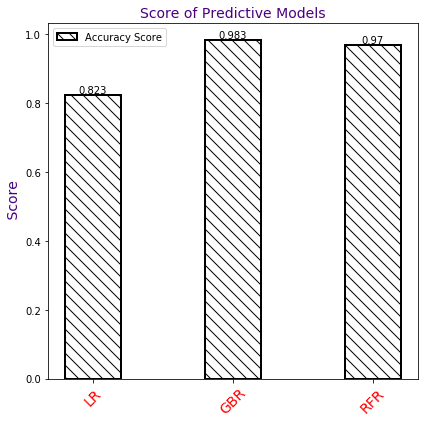

In [112]:
plt.figure(figsize=(6,6))
Algo= ['LR' ,'GBR','RFR' ]
algopos=np.arange(len(Algo))
plt.xticks(algopos,Algo, fontsize=14)
B=[np.round(sc1,3),np.round(sc2,3), np.round(sc3,3)]
plt.bar( Algo, B,label='Accuracy Score',width=0.4,color ="white",edgecolor ="black",hatch ="\\\\", linewidth=2)

for i in range(len(Algo)):
     plt.text(i,B[i],B[i], ha = "center", va= "bottom")
plt.legend()
plt.title('Score of Predictive Models', color='indigo', fontsize=14)
plt.ylabel(' Score', color='indigo', fontsize=14)
#lt.xlabel('Algorithms', color='indigo',fontsize=14)
plt.xticks(rotation=45,color='red')
plt.tight_layout()
plt.savefig('Score0.svg')
plt.show()

# Performance of Algorithms according to the MAE

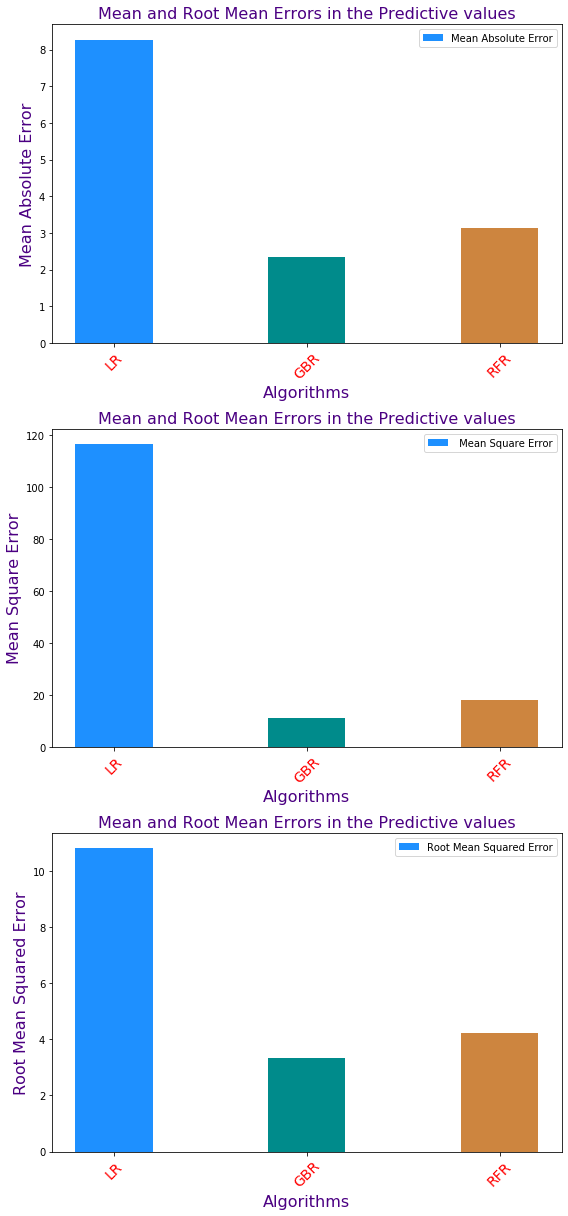

In [51]:
fig, ax = plt.subplots(nrows =3 , ncols= 1,figsize=(8,17))
#ax.set_title("Mean and Root mean squared Errors")
AAE= ['LR' ,'GBR','RFR' ]
xval=range(3)

#ax[0]
BAE= [MAE,MAEG,MAER]
ax[0].bar(AAE,BAE,label='Mean Absolute Error',width=0.4,color=['dodgerblue','darkcyan','peru'])
ax[0].legend()
ax[0].set_xticks(xval)
ax[0].set_xticklabels(AAE,rotation=45,ha='center',fontsize=14,color='red')
ax[0].set_title("Mean and Root Mean Errors in the Predictive values",color='indigo',fontsize=16)
ax[0].set_ylabel('Mean Absolute Error', color='indigo',fontsize=16)
ax[0].set_xlabel('Algorithms',color='indigo',fontsize=16)

# ax[2]
BSSE= [MSE,MSEG,MSER]
ax[1].bar(AAE,BSSE,label=' Mean Square Error',width =0.4,color=['dodgerblue','darkcyan','peru'])
ax[1].legend()
ax[1].set_xticks(xval)
ax[1].set_xticklabels(AAE,rotation=45,ha='center',fontsize=14,color='red')
ax[1].set_title("Mean and Root Mean Errors in the Predictive values",color='indigo',fontsize=16)
ax[1].set_ylabel('Mean Square Error',color='indigo',fontsize=16)
ax[1].set_xlabel('Algorithms',color='indigo',fontsize=16)


# ax[3]
BRSE=[RMSE,RMSEG,RMSER]
ax[2].bar(AAE,BRSE,label='Root Mean Squared Error',width=0.4,color=['dodgerblue','darkcyan','peru'])
ax[2].legend()
ax[2].set_xticks(xval)
ax[2].set_xticklabels(AAE,rotation=45,ha='center',fontsize=14,color='red')
ax[2].set_title("Mean and Root Mean Errors in the Predictive values",color='indigo',fontsize=16)
ax[2].set_ylabel('Root Mean Squared Error',color='indigo',fontsize=16)
ax[2].set_xlabel('Algorithms',color='indigo',fontsize=16)
plt.tight_layout()
plt.savefig('Adnan_Akhter.png')
plt.show()

# Linear regression with gridsearch

In [64]:
#from sklearn.metrics import explained_variance_score
parameters_lr = {'fit_intercept':[True,False], 
              'normalize':[True,False], 
              'copy_X':[True, False]
              }


grid_lr = GridSearchCV(lm,parameters_lr, cv=5,n_jobs=-1, verbose = 0)
#grid = GridSearchCV(lm,parameters_lr, cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)
grid_lr.fit(X_train, y_train)
print(grid_lr.best_params_)
lrpreds = grid_lr.predict(X_test)
lrscore= r2_score(y_test,lrpreds)
print("The score of optimized linear regression using the Gridsearchcv: ",lrscore)
#lrscore=grid.best_score_
print()
lrmae=metrics.mean_absolute_error(y_test, lrpreds)
print("Mean absolute error of linear regression using gridsearch",lrmae)

print()
lrmse=(metrics.mean_squared_error(y_test, lrpreds))
print("Mean squared error of linear regression using gridsearch",lrmse)

print()
lrrmse=np.sqrt(metrics.mean_squared_error(y_test,lrpreds))
print("Root Mean squared error of linear regression using gridsearch",lrrmse)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}
The score of optimized linear regression using the Gridsearchcv:  0.8233464111496334

Mean absolute error of linear regression using gridsearch 8.275716314100393

Mean squared error of linear regression using gridsearch 116.63256642126701

Root Mean squared error of linear regression using gridsearch 10.799655847353055


# gradient boosting with gridsearch

In [74]:
parameters_gb= {   
                  'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.1,0.2,0.5,0.9,1.0],
                  'n_estimators' : [5,10,200, 100],
                  'max_depth'    : [3,4,5,6]
                }

grid_gb = GridSearchCV(grb,parameters_gb, cv=5,n_jobs=-1, verbose = 2)
#grid_gb = GridSearchCV(grb,parameters_gb, cv=5,n_jobs=-1,scoring='neg_mean_absolute_error')
grid_gb.fit(X_train, y_train.values.ravel())
#grid_gb.best_estimators_
print(grid_gb.best_params_)
#gbscore=-grid_gb.best_score_
gbpreds = grid_gb.predict(X_test)
gbscore= r2_score(y_test,gbpreds)
#gmae=-gbmae
print("The score of optimized GradientB using the Gridsearchcv: ",gbscore)
print()
gbmae=metrics.mean_absolute_error(y_test, gbpreds)
print("Mean absolute error of gradient boosting using gridsearch",gbmae)
print()

gbmse=(metrics.mean_squared_error(y_test, gbpreds))
print("Mean squared error of gradient boosting using gridsearch",gbmse)
print()

gbrmse=np.sqrt(metrics.mean_squared_error(y_test,gbpreds))
print("Root Mean squared error of gradient boosting using gridsearch",gbrmse)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 1593 out of 1600 | elapsed:   55.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:   55.9s finished


{'learning_rate': 0.04, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.5}
The score of optimized GradientB using the Gridsearchcv:  0.9858211437772882

Mean absolute error of gradient boosting using gridsearch 1.9404179107634123

Mean squared error of gradient boosting using gridsearch 9.361351789879562

Root Mean squared error of gradient boosting using gridsearch 3.059632623351954


# random forest with grid

In [100]:
param_rfr = {'bootstrap': [True,False], 
                  'n_estimators': [400,300,200, 100], 
                  'max_depth': [3,4,5,None], 
                  'min_samples_leaf':[1,3],
                  #'min_samples_split': [1, 2, 10, 12],
                  'max_features': ['auto', 'log2', None]
                  
}

grid_rfr = GridSearchCV(rfr,param_rfr, cv=5,n_jobs=-1, verbose = 2)
#grid_rfr = GridSearchCV( rfr, param_rfr, cv = 5, n_jobs = -1)

# grid_rfr = GridSearchCV(estimator = rfr, param_grid = param_rfr, 
 #                         cv = 5, n_jobs = -1,scoring='neg_mean_absolute_error')
grid_rfr.fit(X_train, y_train.values.ravel())
print(grid_rfr.best_params_)
rfrpreds = grid_rfr.predict(X_test)
rfrscore= r2_score(y_test,rfrpreds)
#rfrscore=grid_rfr.best_score_
#rfmae=-rfrmae
print("The score of optimized Random forest regression using the Gridsearchcv: ",rfrscore)
print()
rfrmae=metrics.mean_absolute_error(y_test, rfrpreds)
print("Mean absolute error of random forest regression using gridsearch",rfrmae)

print()
rfrmse=(metrics.mean_squared_error(y_test, rfrpreds))
print("Mean squared error of random forest regression using gridsearch",rfrmse)
print()

rfrrmse=np.sqrt(metrics.mean_squared_error(y_test,rfrpreds))
print("Root Mean squared error of random forest regression using gridsearch",rfrrmse)


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  3.8min finished


{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 400}
The score of optimized Random forest regression using the Gridsearchcv:  0.9716825844597438

Mean absolute error of random forest regression using gridsearch 3.096512202380972

Mean squared error of random forest regression using gridsearch 18.696098224616996

Root Mean squared error of random forest regression using gridsearch 4.323898498417487


# All Algo with randomized search

In [67]:
hparameters_lr= {
              'fit_intercept':[True,False], 
              'normalize':[True,False], 
              'copy_X':[True, False]
              }
# Set up the random search with 4-fold cross validation
random_lr = RandomizedSearchCV(lm, hparameters_lr, cv=5, n_jobs = -1, verbose = 2)
random_lr.fit(X_train, y_train)
print(random_lr.best_params_)
lrrpreds = random_lr.predict(X_test)
rlrscore= r2_score(y_test,lrrpreds)
#rlrscore=random_cv.best_score_

print("The score of optimized Linear regression using the Randomizedsearchcv: ",rlrscore) 
print()
rlrmae=metrics.mean_absolute_error(y_test, lrrpreds)
print("Mean absolute error of linear regression using randomized",rlrmae)

print()
rlrmse=(metrics.mean_squared_error(y_test, lrrpreds))
print("Mean squared error of linear regression using radomizedsearch",rlrmse)

print()
rlrrmse=np.sqrt(metrics.mean_squared_error(y_test,lrrpreds))
print("Root Mean squared error of linear regression using randomizedsearch",rlrrmse)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'normalize': True, 'fit_intercept': True, 'copy_X': True}
The score of optimized Linear regression using the Randomizedsearchcv:  0.8233464111496334

Mean absolute error of linear regression using randomized 8.275716314100393

Mean squared error of linear regression using radomizedsearch 116.63256642126701

Root Mean squared error of linear regression using randomizedsearch 10.799655847353055


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


In [76]:

# Define the grid of hyperparameters to search
hparameter_gb = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.1,0.2,0.5,0.9,1.0],
                  'n_estimators' : [5,10,200, 100],
                  'max_depth'    : [3,4,5,6]

    }

# Set up the random search with 4-fold cross validation
random_gb = RandomizedSearchCV(grb, hparameter_gb, cv=5, n_jobs = -1, verbose = 2)
random_gb.fit(X_train, y_train.values.ravel())
print(random_gb.best_params_)
gbrpreds = random_gb.predict(X_test)
rgbscore= r2_score(y_test,gbrpreds)
#rgbscore=random_cv.best_score_
print("The score of optimized GradientB regression using the Randomizedsearchcv: ",rgbscore)

print()

rgbmae=metrics.mean_absolute_error(y_test, gbrpreds)
print("Mean absolute error of gradient regression using randomized",rgbmae)

print()
rgbmse=(metrics.mean_squared_error(y_test, gbrpreds))
print("Mean squared error of gradient boosting regression using randomizedsearch",rgbmse)

print()
rgbrmse=np.sqrt(metrics.mean_squared_error(y_test,gbrpreds))
print("Root Mean squared error of gradient B regression using randomizedsearch",rgbrmse)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'subsample': 0.5, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.03}
The score of optimized GradientB regression using the Randomizedsearchcv:  0.9842348366357114

Mean absolute error of gradient regression using randomized 2.0560520425603044

Mean squared error of gradient boosting regression using randomizedsearch 10.408684449569833

Root Mean squared error of gradient B regression using randomizedsearch 3.2262492850940445


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.4s finished


In [80]:
# Define the grid of hyperparameters to search
hparameter_rfr = {'bootstrap': [True,False], 
                  'n_estimators': [400,300,200, 100], 
                  'max_depth': [3,4,5,8,None], 
                  'min_samples_leaf':[1,3],
                  #'min_samples_split': [1, 8, 10, 12,2],
                  'max_features': ['auto', 'log2', None]
                  
    }

# Set up the random search with 4-fold cross validation
random_rfr = RandomizedSearchCV(rfr, hparameter_rfr, cv=5, n_jobs = -1, verbose = 2)
random_rfr.fit(X_train, y_train.values.ravel())
print(random_rfr.best_params_)
rfrrpreds = random_rfr.predict(X_test)
rrfrscore= r2_score(y_test,rfrrpreds)
#rrfrscore=random_cv.best_score_
print("The score of optimized Random forest regression using the Randomizedsearchcv: ",rrfrscore)

print()

rrfrmae=metrics.mean_absolute_error(y_test, rfrrpreds)
print("Mean absolute error of random forest regression using randomized",rrfrmae)

print()

rrfrmse=(metrics.mean_squared_error(y_test, rfrrpreds))
print("Mean squared error of random forest regression using randomizedsearch",rrfrmse)

print()
rrfrrmse=np.sqrt(metrics.mean_squared_error(y_test,rfrrpreds))
print("Root Mean squared error of random forest regression using randomizedsearch",rrfrrmse)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.0s finished


{'n_estimators': 400, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'bootstrap': False}
The score of optimized Random forest regression using the Randomizedsearchcv:  0.976134489307846

Mean absolute error of random forest regression using randomized 2.1329779761905017

Mean squared error of random forest regression using randomizedsearch 15.75680278614582

Root Mean squared error of random forest regression using randomizedsearch 3.969483944563301


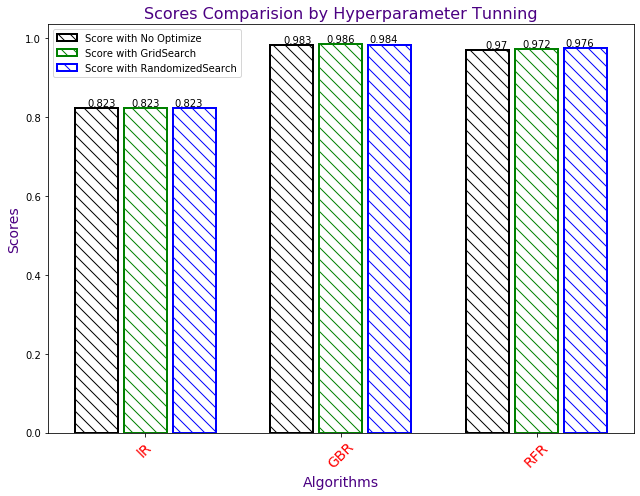

In [113]:
string= ['lR' ,'GBR','RFR' ]
convert_str=np.arange(len(string))  # the label locations
width = 0.22  # the width of the bars
accuracy= [np.round(sc1,3),np.round(sc2,3), np.round(sc3,3)]
gridsearch= [np.round(lrscore,3),np.round(gbscore,3),np.round(rfrscore,3)]
randomsearch=[np.round(rlrscore,3),np.round(rgbscore,3),np.round(rrfrscore,3)]

fig, ax = plt.subplots(figsize=(9,7))
rects1 = ax.bar(convert_str - 0.25, accuracy, width, label='Score with No Optimize',color ="white",edgecolor ="black",hatch ="\\\\",linewidth=2)
rects2 = ax.bar(convert_str , gridsearch, width, label='Score with GridSearch',color ="white",edgecolor ="green",hatch ="\\\\",linewidth=2)
rects3 = ax.bar(convert_str + 0.25, randomsearch, width, label='Score with RandomizedSearch',color ="white",edgecolor ="blue",hatch ="\\\\",linewidth=2)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores', color='indigo', fontsize=14)
ax.set_xlabel('Algorithms', color='indigo', fontsize=14)
ax.set_title('Scores Comparision by Hyperparameter Tunning',color='indigo',fontsize=16)
ax.set_xticks(convert_str)
ax.set_xticklabels(string,rotation=45,ha='center',fontsize=14,color='red')
ax.legend()
def autolabel(rects, xpos='center'):
   ha = {'center': 'center', 'right': 'left', 'left': 'right'}
   offset = {'center': 0, 'right': 1, 'left': -1}
   for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
         xy=(rect.get_x() + rect.get_width() / 2, height),
         xytext=(offset[xpos]*-20, 0), # use 3 points offset
         textcoords="offset points", # in both directions
         ha=ha[xpos], va='bottom')

autolabel(rects1, "left")
autolabel(rects2, "center")
autolabel(rects3, "right")

fig.tight_layout()
plt.savefig('Optimizeddd0.svg')
plt.show()

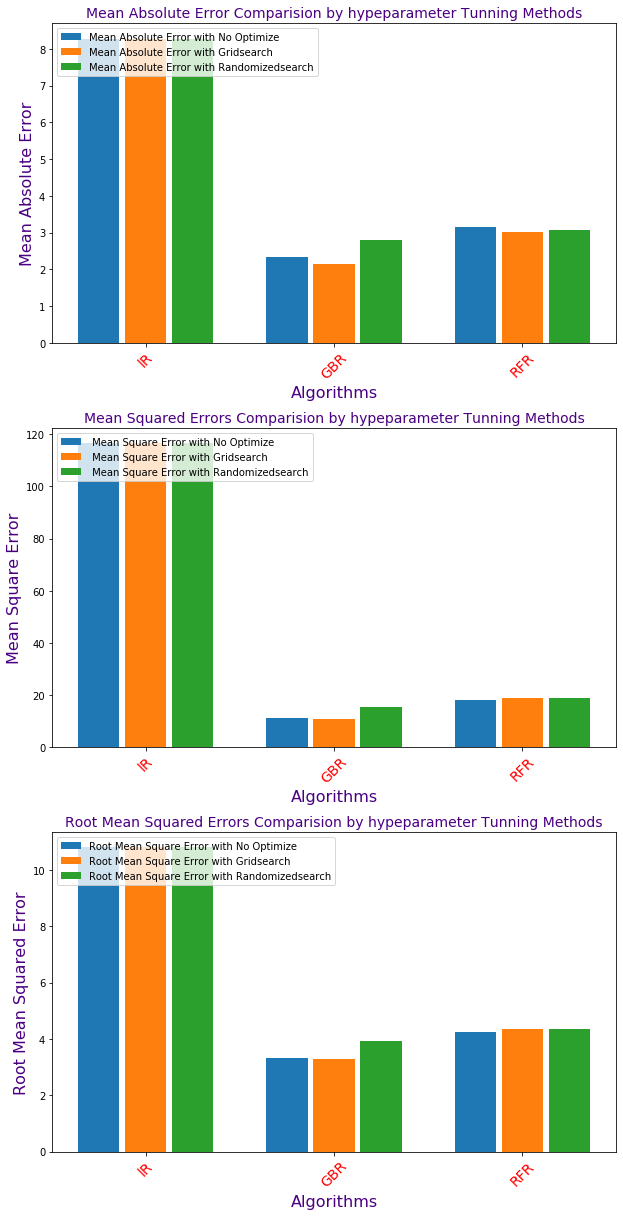

In [71]:
fig, ax = plt.subplots(nrows =3 , ncols= 1,figsize=(9,17))
#ax.set_title("Mean and Root mean squared Errors")
string= ['lR' ,'GBR','RFR' ]
convert_str=np.arange(len(string))  # the label locations
width = 0.22  # the width of the bars

#ax[0]
sBAE= [np.round(MAE,3),np.round(MAEG,3),np.round(MAER,3)]
gridBAE=[np.round(lrmae,3),np.round(gbmae,3),np.round(rfrmae,3)]
randomBAE=[np.round(rlrmae,3),np.round(rgbmae,3),np.round(rrfrmae,3)]
ax[0].bar(convert_str- 0.25,sBAE,width,label='Mean Absolute Error with No Optimize')
ax[0].bar(convert_str,gridBAE,width,label='Mean Absolute Error with Gridsearch')
ax[0].bar(convert_str+ 0.25,randomBAE,width,label='Mean Absolute Error with Randomizedsearch')
ax[0].legend(loc="upper left")
ax[0].set_xticks(convert_str)
ax[0].set_xticklabels(string,rotation=45,ha='center',fontsize=14,color='red')
ax[0].set_title("Mean Absolute Error Comparision by hypeparameter Tunning Methods",color='indigo',fontsize=14)
ax[0].set_ylabel('Mean Absolute Error', color='indigo',fontsize=16)
ax[0].set_xlabel('Algorithms',color='indigo',fontsize=16)

# ax[2]
sBSSE= [MSE,MSEG,MSER]
girdBSSE=[lrmse,gbmse,rfrmse]
randomBSSE=[rlrmse,rgbmse,rrfrmse]
ax[1].bar(convert_str- 0.25,sBSSE,width,label=' Mean Square Error with No Optimize')
ax[1].bar(convert_str,girdBSSE,width,label=' Mean Square Error with Gridsearch')
ax[1].bar(convert_str+ 0.25,randomBSSE,width,label=' Mean Square Error with Randomizedsearch')
ax[1].legend(loc="upper left")
ax[1].set_xticks(convert_str)
ax[1].set_xticklabels(string,rotation=45,ha='center',fontsize=14,color='red')
ax[1].set_title("Mean Squared Errors Comparision by hypeparameter Tunning Methods",color='indigo',fontsize=14)
ax[1].set_ylabel('Mean Square Error',color='indigo',fontsize=16)
ax[1].set_xlabel('Algorithms',color='indigo',fontsize=16)


# ax[3]
sBRSE=[np.round(RMSE,3),np.round(RMSEG,3),np.round(RMSER,3)]
girdBRSE=[np.round(lrrmse,3),np.round(gbrmse,3),np.round(rfrrmse,3)]
randomBRSE=[np.round(rlrrmse,3),np.round(rgbrmse,3),np.round(rrfrrmse,3)]
ax[2].bar(convert_str- 0.25,sBRSE,width,label='Root Mean Square Error with No Optimize')
ax[2].bar(convert_str,girdBRSE,width,label='Root Mean Square Error with Gridsearch')
ax[2].bar(convert_str+ 0.25,randomBRSE,width,label='Root Mean Square Error with Randomizedsearch')
ax[2].legend(loc="upper left")
ax[2].set_xticks(convert_str)
ax[2].set_xticklabels(string,rotation=45,ha='center',fontsize=14,color='red')
ax[2].set_title("Root Mean Squared Errors Comparision by hypeparameter Tunning Methods",color='indigo',fontsize=14)
ax[2].set_ylabel('Root Mean Squared Error',color='indigo',fontsize=16)
ax[2].set_xlabel('Algorithms',color='indigo',fontsize=16)
plt.tight_layout()
plt.savefig('Mean_errors.png')
plt.show()

In [72]:
# string= ['lR' ,'GBR','RFR' ]
# convert_str=np.arange(len(string))
# ##################################
# plt.figure(figsize=(8,10))
# plt.xticks(convert_str,string,rotation=45)
# accuracy= [np.round(sc1,3),np.round(sc2,3), np.round(sc3,3)]
# gridsearch= [np.round(lrscore,3),np.round(gbscore,3),np.round(rfrscore,3)]
# randomsearch=[np.round(rlrscore,3),np.round(rgbscore,3),np.round(rrfrscore,3)]
# p1=plt.bar(convert_str-0.17,accuracy,width=0.17,label="Score with Simple Algorithms")
# p2=plt.bar(convert_str,gridsearch,width=0.17, label='Score with GridSearch')
# p3=plt.bar(convert_str+0.17,randomsearch,width=0.17, label='Score with RandomizedSearch')
# for i in range(len(string)):
#      plt.text(i,accuracy[i],accuracy[i], ha = "right", va= "top")
#      plt.text(i,gridsearch[i],gridsearch[i], ha = "center", va= "bottom")         
#      plt.text(i,randomsearch[i],randomsearch[i], ha = "left", va= "top")
# plt.ylabel('Score', color='red')
# plt.xlabel('Algorithms',color='red')
# #plt.bar_label(p1,)
# plt.legend(loc='upper right')
# plt.tight_layout()
# plt.show()

In [73]:
# from sklearn.preprocessing import StandardScaler
# #from sklearn.preprocessing import MinMaxScaler

# # fit scaler on training data
# norm = StandardScaler().fit(x_train)

# # transform training data
# X_train_norm = norm.transform(x_train)

# # transform testing dataabs
# X_test_norm = norm.transform(x_test)

In [ ]:
# plt.figure(figsize=(3,6))
# plt.subplot(3,1,1)
# plt.xticks(aaes,AAE,rotation=45)
# BAE= (MAE,MAEG,MAER)
# plt.bar(aaes,BAE,label='Mean Absolute Error',width=0.5,color=['red','Green','brown'])
# plt.ylabel('Mean Absolute Error', color='red')
# plt.xlabel('Algorithms',color='red')

# plt.subplot(3,1,2)
# plt.xticks(aaes,AAE,rotation=45)
# BSE= (MSE,MSEG,MSER)
# plt.bar(aaes,BSE, label=' Mean Square Error',width=0.5,color=['red','Green','red'])
# plt.ylabel('Mean Square Error',color='red')
# plt.xlabel('Algorithms',color='red')

# plt.subplot(3,1,3)
# plt.xticks(aaes,AAE,rotation=45)
# BRSE=(RMSE,RMSEG,RMSER)
# plt.bar(aaes,BRSE,label='Root Mean Square Error',width=0.5,color=['Blue','Green','Black'])
# plt.xticks(rotation=30)
# plt.ylabel('Root Mean Squared Error',color='red')
# plt.xlabel('Algorithms',color='red')
# plt.tight_layout()
# plt.legend()
# plt.show()

In [ ]:
# parameters_lr = {'fit_intercept':[True,False], 
#               'normalize':[True,False], 
#               'copy_X':[True, False]
#               }


# grid = GridSearchCV(lm,parameters_lr,cv=5,scoring='neg_mean_absolute_error', cv=5,n_jobs=-1, verbose = 0)
# #grid = GridSearchCV(lm,parameters_lr, cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# lrmae=-grid.best_score_
# #rmae=-lrmae
# print("The score of optimized linear regression using the Gridsearchcv: ",lrmae)

In [ ]:
# AAE= ['linear Regression' ,'Gradient Boosting Regeession','Random Forest Regression' ]
# aaes=np.arange(len(AAE))

In [ ]:
# #plt.figure(figsize=(10,10))
# #plt.subplot(2,2,1)
# AAE= ['linear Regression' ,'Gradient Boosting Regeession','Random Forest Regression' ]
# aaes=np.arange(len(AAE))
# plt.xticks(aaes,AAE,rotation=45)
# BAE= [MAE,MAEG,MAER]
# BSE= [MSE,MSEG,MSER]
# BRSE=[RMSE,RMSEG,RMSER]

# plt.bar(aaes,BAE,width=0.3)
# plt.bar(aaes+0.4,BSE,width=0.5)
# plt.bar(aaes+0.8,BRSE,width=0.5)
# plt.ylabel('Mean Absolute Error', color='red')
# plt.xlabel('Algorithms',color='red')


# Performance of Algorithms according to the RMAE

In [ ]:
# ARAE= ['linear Regression' ,'Gradient Boosting Regeession','Random Forest Regression' ]
# BRAE= (RMAE,RMAEG,RMAER)
# ax=plt.figure(figsize=(8,6))
# plt.bar( ARAE,BRAE, label='Root Mean Absolute Error',color=['red','Green','Yellow'])
# plt.ylabel('Root Mean Absolute Error',color='red')
# plt.xlabel('Algorithms',color='red')
# plt.legend()
# plt.show()

In [ ]:
# parameters_gb= {   
#                   'learning_rate': [0.01,0.02,0.03,0.04],
#                   'subsample'    : [0.1,0.2,0.5,0.9,1.0],
#                   'n_estimators' : [5,10,200, 100],
#                   'max_depth'    : [3,4,5,6]
#                 }

# grid_gb = GridSearchCV(grb,parameters_gb, cv=5,n_jobs=-1,scoring='neg_mean_squared_error', verbose = 2)
# #grid_gb = GridSearchCV(grb,parameters_gb, cv=5,n_jobs=-1,scoring='neg_mean_absolute_error')
# grid_gb.fit(X_train, y_train.values.ravel())
# #grid_gb.best_estimators_
# print(grid_gb.best_params_)
# gbmse=-grid_gb.best_score_
# #gmae=-gbmae
# print("The score of optimized GradientB using the Gridsearchcv: ",gbmse)
#  grmse=np.sqrt(gbmse)
#  print("The Root mean squared error of optimized GradientB regression using the Gridsearchcv:",grmse)

In [ ]:
# parameters_gb= {   
#                   'learning_rate': [0.01,0.02,0.03,0.04],
#                   'subsample'    : [0.1,0.2,0.5,0.9,1.0],
#                   'n_estimators' : [5,10,200, 100],
#                   'max_depth'    : [3,4,5,6]
#                 }

# grid_gb = GridSearchCV(grb,parameters_gb, cv=5,n_jobs=-1,scoring='neg_mean_absolute_error', verbose = 2)
# #grid_gb = GridSearchCV(grb,parameters_gb, cv=5,n_jobs=-1,scoring='neg_mean_absolute_error')
# grid_gb.fit(X_train, y_train.values.ravel())
# #grid_gb.best_estimators_
# print(grid_gb.best_params_)
# gbmae=-grid_gb.best_score_
# #gmae=-gbmae
# print("The score of optimized GradientB using the Gridsearchcv: ",gbmae)

In [ ]:
# parameters_lr = {'fit_intercept':[True,False], 
#               'normalize':[True,False], 
#               'copy_X':[True, False]
#               }


# grid = GridSearchCV(lm,parameters_lr,cv=5,scoring='neg_mean_squared_error', cv=5,n_jobs=-1, verbose = 0)
# #grid = GridSearchCV(lm,parameters_lr, cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# lrmse=-grid.best_score_
# #rmae=-lrmae
# print("The score of optimized linear regression using the Gridsearchcv: ",lrmse)
# lrrmse=np.sqrt(gbmse)
#  print("The Root mean squared error of optimized GradientB regression using the Gridsearchcv:",lrrmse)

# Performance of Algorithms according to the MSE

In [ ]:
# ASE= ['linear Regression' ,'Gradient Boosting Regeession','Random Forest Regression' ]
# BSE= (MSE,MSEG,MSER)
# ax=plt.figure(figsize=(8,6))
# plt.bar( ASE,BSE, label=' Mean Square Error',color=['red','Green','red'])
# plt.ylabel('Mean Square Error',color='red')
# plt.xlabel('Algorithms',color='red')
# plt.legend()
# plt.show()

# Performance of Algorithms according to the RMSE

In [ ]:
# ARSE= ['linear Regression' ,'Gradient Boosting Regeession','Random Forest Regression' ]
# BRSE=(RMSE,RMSEG,RMSER)
# ax=plt.figure(figsize=(8,6))
# plt.bar( ARSE,BRSE,label='Root Mean Square Error',color=['Blue','Green','Black'])
# plt.ylabel('Root Mean Squared Error',color='red')
# plt.xlabel('Algorithms',color='red')
# plt.legend()
# plt.show()

In [ ]:

# parameters_lr = {'fit_intercept':[True,False], 
#               'normalize':[True,False], 
#               'copy_X':[True, False]}

# grid = GridSearchCV(lm,parameters_lr, cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)
# grid.fit(x_train, y_train)
# grid.best_params_
# lrmae=grid.best_score_
# rmae=-lrmae
# print("The Mean Absolute error of optimized linear regression using the Gridsearchcv: ",rmae)

In [ ]:

# parameters_lr = {'fit_intercept':[True,False], 
#               'normalize':[True,False], 
#               'copy_X':[True, False]}

# grid = GridSearchCV(lm,parameters, cv=5,scoring='neg_mean_squared_error')
# grid.fit(x_train, y_train)
# grid.best_params_
# lrmse=grid.best_score_
# rmse=-lrmse
# print("The Mean squared error of optimized linear regression using the Gridsearchcv: ",rmse)
# rootmse=np.sqrt(rmse)
# print("The Root mean squared error of optimized linear regression using the Gridsearchcv:",rootmse)

In [ ]:

# parameters_gb= {     'learning_rate': [0.01,0.02,0.03,0.04],
#                   'subsample'    : [0.1,0.2,0.5,0.9,1.0],
#                   'n_estimators' : [100,500,1000, 1500],
#                   'max_depth'    : [3,4,5,6]}

# grid_gb = GridSearchCV(grb,parameters_gb, cv=5,n_jobs=-1,scoring='neg_mean_absolute_error')
# grid_gb.fit(x_train, y_train)
# #grid_gb.best_estimators_
# grid_gb.best_params
# gbmae=grid_gb.best_score_
# gmae=-gbmae
# print("The Mean Absolute error of optimized GradientB using the Gridsearchcv: ",gmae)

In [ ]:

# parameters_gb= {     'learning_rate': [0.01,0.02,0.03,0.04],
#                   'subsample'    : [0.1,0.2,0.5,0.9,1.0],
#                   'n_estimators' : [100,500,1000, 1500],
#                   'max_depth'    : [3,4,5,6]}

# grid_gb = GridSearchCV(grb,parameters_gb, cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
# grid_gb.fit(x_train, y_train)
# grid_gb.best_estimators_
# grid_gb.best_params
# gbmse=grid_gb.best_score_
# gmse=-gbmse
# print("The Mean squared error of optimized GradientB regression using the Gridsearchcv: ",gbmse)
# grmse=np.sqrt(gbmse)
# print("The Root mean squared error of optimized GradientB regression using the Gridsearchcv:",grmse)

In [ ]:

# param_rfr = {
#     'bootstrap': [True],
#     'max_depth': [3, 4, 5, None],
#     'max_features': ['auto', 'log2'],
#     'min_samples_leaf': [1,3, 4, 5],
#     'min_samples_split': [1, 8, 10, 12],
#     'n_estimators': [5,6,7,8,20,55,100]
# }
# grid_rfr = GridSearchCV(estimator = rfr, param_grid = param_rfr, 
#                           cv = 5, n_jobs = -1,scoring='neg_mean_absolute_error')
# grid_rfr.fit(x_train, y_train)
# grid_rfr.best_params
# rfrmae=grid_rfr.best_score_
# rfmae=-rfrmae
# print("The Mean Absolute error of optimized Random forest regression using the Gridsearchcv: ",rfmae)

In [ ]:

# param_rfr = {
#     'bootstrap': [True],
#     'max_depth': [3, 4, 5, None],
#     'max_features': ['auto', 'log2'],
#     'min_samples_leaf': [1,3, 4, 5],
#     'min_samples_split': [1, 8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# grid_search = GridSearchCV(estimator = rfr, param_grid = param_rfr, 
#                           cv = 5, n_jobs = -1,scoring='neg_mean_squared_error')
# grid_rfr.fit(x_train, y_train)
# grid_rfr.best_estimators_
# grid_rfr.best_params
# rfrmse=grid_rfr.best_score_
# rfmse=-rfrmse
# print("The Mean squared error of random forest regression using the Gridsearchcv: ",rfmse)
# rrmse=np.sqrt(rfmse)
# print("The Root mean squared error of random forest regression using the Gridsearchcv:",rrmse)